In [23]:
import new_adventure as na
import new_adventure.derivative_free_estimation as dfe
import numpy as np
import matplotlib.pyplot as plt
import time

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
ws = np.array([[1, 0], [1, 0], [2, 1], [2, 1]])
bs = [-0.1, 0.1, 0.3, -0.3]
barrier = na.Barriers.LogPolytopeBarrier(ws, bs)
se_barrier = na.Functions.ShiftEstimation(barrier, 0.001, np.eye(2), 1000)
res = []
res1 = []
res1_se = []
res2 = []
res2_se = []
upper_bound = -0.05
lower_bound = -0.07
for x in np.linspace(lower_bound, upper_bound, 100):
    res.append(barrier.f(np.array([[x,0]])))
    res1.append(barrier.f1(np.array([[x,0]])))
#     res1_se.append(se_barrier.f1(np.array([[x,0]])))
    res2.append(barrier.f2(np.array([[x,0]])))
    res2_se.append(se_barrier.f2(np.array([[x,0]])))
    


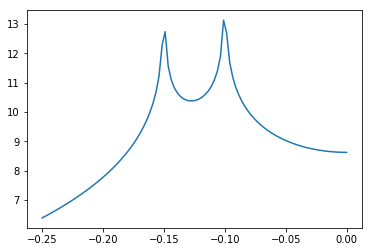

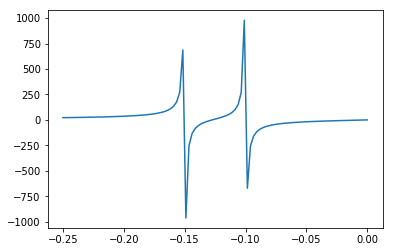

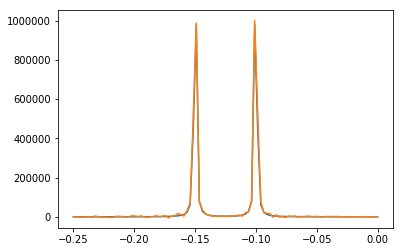

In [28]:
plt.plot(np.linspace(lower_bound, upper_bound, 100), res)
plt.show()
plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res1)[:, 0, 0],)
# plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res1_se)[:, 0, 0],)

plt.show()
plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res2)[:, 0, 0, 0])
# plt.show()
plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res2_se)[:, 0, 0, 0])


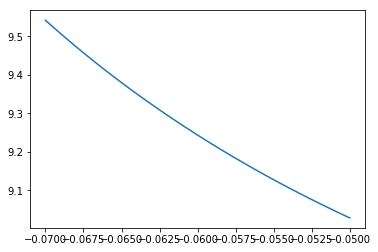

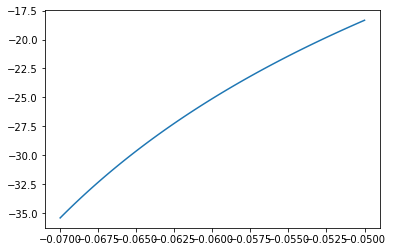

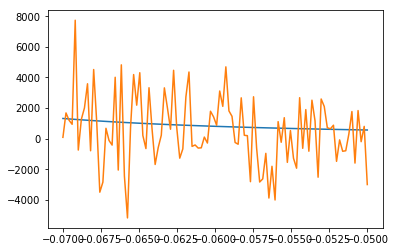

In [31]:
plt.plot(np.linspace(lower_bound, upper_bound, 100), res)
plt.show()
plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res1)[:, 0, 0],)
# plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res1_se)[:, 0, 0],)

plt.show()
plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res2)[:, 0, 0, 0])
# plt.show()
plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res2_se)[:, 0, 0, 0])


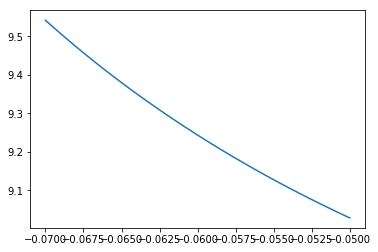

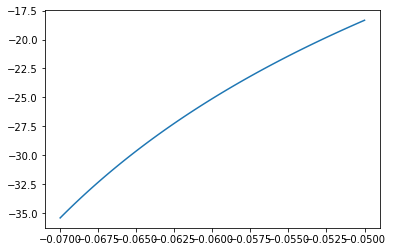

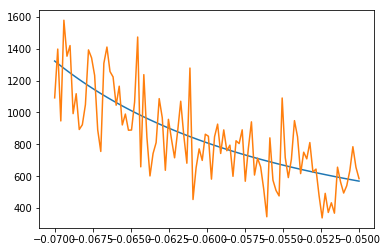

In [33]:
plt.plot(np.linspace(lower_bound, upper_bound, 100), res)
plt.show()
plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res1)[:, 0, 0],)
# plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res1_se)[:, 0, 0],)

plt.show()
plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res2)[:, 0, 0, 0])
# plt.show()
plt.plot(np.linspace(lower_bound, upper_bound, 100), np.array(res2_se)[:, 0, 0, 0])


In [111]:
r = []
for n in range(1, 10000, 100):
    a = time.time()
    dfe.second_shift_estimator(f, np.array([7]), cov, 0.02, N=n, control_variate=True)
    r.append(time.time() - a)
    

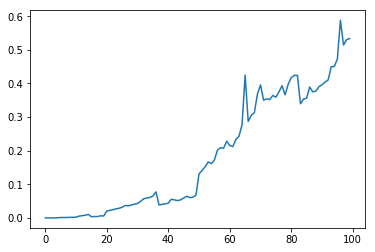

In [112]:
plt.plot(r)
plt.show()

In [184]:
res = None
num_runs = 100
for _ in range(num_runs):
    if res is None:
        res = dfe.second_shift_estimator(f, np.array([ 7.98182971e+00, -8.47282729e+00]), np.eye(2), 0.02, N=1000, control_variate=True)
    else:
        res += dfe.second_shift_estimator(f, np.array([  7.98182971e+00, -8.47282729e+00]), np.eye(2), 0.02, N=1000, control_variate=True)

res / num_runs

array([[-18.96110682,  -1.67342064],
       [ -1.67342064,  14.09657456]])

In [230]:
res = None
num_runs = 100
for _ in range(num_runs):
    if res is None:
            res = dfe.first_shift_estimator(f, np.array([ 0.09762701 ,0.43037873]), np.eye(2), 0.02, N=1000, control_variate=True)
    else:
            res += dfe.first_shift_estimator(f, np.array([  0.09762701,0.43037873]), np.eye(2), 0.02, N=1000, control_variate=True)

res / num_runs

array([-415.77710827,  416.82813926])

In [106]:
res = []
for _ in range(10):
    res.append(dfe.second_shift_estimator(f, np.array([1, 1]), np.eye(2), 0.02, N=2000, control_variate=True)[0][0])
    
print(np.mean(res))

[autoreload of new_adventure.Functions failed: Traceback (most recent call last):
  File "/Users/daniellengyel/miniconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/Users/daniellengyel/miniconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 374, in superreload
    module = reload(module)
  File "/Users/daniellengyel/miniconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/daniellengyel/miniconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_wit

4.574720064466068


In [546]:
res = []
for _ in range(100):
    res.append(dfe.second_estimator(f, np.array([5]), cov, 0.5, N=5000, control_variate=False)[0][0])
    
print(np.mean(res))

73.51088518006114


In [101]:
all_mse = []
all_approx = []

start_theta = 0 
end_theta = 1
num_points = 11

N = 10000
for t in np.linspace(start_theta, end_theta, num_points):
    mse = []
    approxs = []
    taus = np.linspace(0.01, 0.5, 10)
    theta_star = np.array([t])
    curr_hessian = f.f2(np.array([theta_star]))
    for tau in taus:
        curr_errs = []
        curr_approx = []
        for _ in range(1):
            approx = dfe.second_shift_estimator(f, theta_star, cov, tau, N=N, control_variate=True)
            approx = np.array([approx])
#             print(approx)
            curr_approx.append(approx[0])
            curr_errs.append((approx - curr_hessian).reshape(-1).dot((approx - curr_hessian).reshape(-1)))
        mse.append(np.mean(curr_errs))
        approxs.append(np.mean(curr_approx))
    all_mse.append(mse)
    all_approx.append(approxs)

In [104]:
#### for i, t in enumerate(np.linspace(start_theta, end_theta, num_points)):
    print(t)
#     plt.ylim(0, 10)
#     if t < 6 :
#         continue
    plt.plot(taus, all_approx[i])

1.0


0.0
1.1111111111111112
2.2222222222222223
3.3333333333333335
4.444444444444445
5.555555555555555
6.666666666666667
7.777777777777779
8.88888888888889
10.0


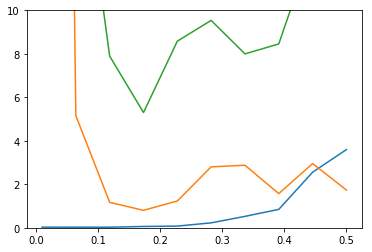

In [4]:
for i, t in enumerate(np.linspace(start_theta, end_theta, num_points)):
    print(t)
    plt.plot(taus, all_mse[i])
    plt.ylim(0, 10)
#     plt.xlim(0, 2)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


Text(0, 0.5, "Estimated f''(x)")

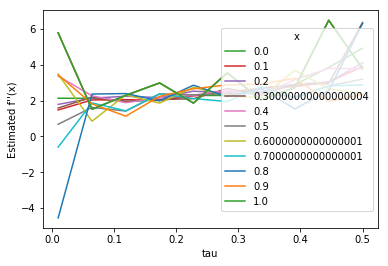

In [105]:
for i, t in enumerate(np.linspace(start_theta, end_theta, num_points)):
    print(t)
#     plt.ylim(0, 10)
#     if t < 6 :
#         continue
    plt.plot(taus, all_approx[i], label=t)
plt.legend(loc="right", title="x")
plt.xlabel("tau")
plt.ylabel("Estimated f''(x)")

In [ ]:
for i, t in enumerate(np.linspace(start_theta, end_theta, num_points)):
    print(t)
    plt.plot(taus, all_approx[i])

In [ ]:
def costum(xs, weights):
    """xs.shape = (N, d), weights.shape = (N)"""
    xs_adjusted = (xs.T - xs.T * weights).T
    outer_adjusted = np.array([np.outer(x_adjusted, x_adjusted) for x_adjusted in xs_adjusted])
    res = None
    for i, o in enumerate(outer_adjusted): 
        if res is None:
            res = weights[i] * o
        else:
            res += weights[i] * o
    return res

xs = np.array([[1, 2], [3, 4]])
weights = np.array([0.5 , 0.1])
costum(xs, weights)

0.0
0.4
0.8
1.2000000000000002
1.6
2.0


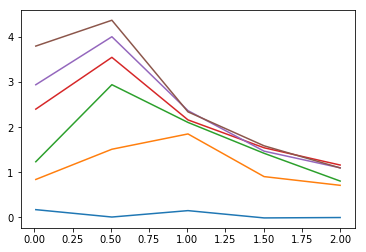

In [222]:
for i, t in enumerate(np.linspace(0, 2, 6)):
    print(t)
#     plt.ylim(0, 50)
    plt.plot(taus, np.array(all_approx)[:, :, 0][i])

In [219]:
np.array(all_approx)[:, :, 0]

array([[ 1.72373133e-01,  8.68400955e-03,  1.50744697e-01,
        -1.08907872e-02, -2.31312744e-03],
       [ 8.41626519e-01,  1.51145763e+00,  1.85081112e+00,
         9.04981458e-01,  7.11756365e-01],
       [ 1.23447868e+00,  2.94225805e+00,  2.10599643e+00,
         1.42172999e+00,  8.06056316e-01],
       [ 2.40068347e+00,  3.54856466e+00,  2.16211957e+00,
         1.54378110e+00,  1.16129379e+00],
       [ 2.94150063e+00,  4.00543938e+00,  2.36688560e+00,
         1.46913925e+00,  1.09935593e+00],
       [ 3.79826283e+00,  4.37095878e+00,  2.34049818e+00,
         1.58760591e+00,  1.09728300e+00]])

In [265]:
a = np.array([[1, 2, 4], [3, 4, 4]])
b = np.array([[1, 2, 4], [100, 4, 200]])
print(b.dot(a.T))
c = b.dot(a.T) - np.array([1, 2])
print(c)
d = np.log(c)
print(d)
e = np.sum(d, axis=1)
print(e)
1/e.reshape(len(e), 1) * b


[[  21   27]
 [ 908 1116]]
[[  20   25]
 [ 907 1114]]
[[2.99573227 3.21887582]
 [6.81014245 7.01571242]]
[ 6.2146081  13.82585487]


array([[ 0.16091119,  0.32182238,  0.64364477],
       [ 7.23282581,  0.28931303, 14.46565163]])

In [366]:
dists = np.array([[1, 2, 3, 4], [10, 20, 30, 40]])
xs = np.array([[1, 2], [10, 20]])
ws = np.array([[1, 0], [2, 0], [2, 1], [3, 4]])
ws.T * dists[0]


pre_inv = np.array([[[0.03024944, 0.00335639], [0.00335639, 0.00037242]]])
np.array([np.linalg.inv(pre_inv[i]) for i in range(len(pre_inv))])

array([[[ 2.61140838e+06, -2.35350007e+07],
        [-2.35350007e+07,  2.12109020e+08]]])

In [380]:
a = np.array([np.eye(2), np.eye(2)])
b = np.array([1, 2])
print(a.dot(b))

[[1. 2.]
 [1. 2.]]


In [246]:
res = None
num_runs = 100
tau_theta = np.array([0.1, 1])
for _ in range(num_runs):
    if res is None:
            res = dfe.first_shift_estimator(f, tau_theta, np.eye(2), 0.02, N=1000, control_variate=True)
    else:
            res += dfe.first_shift_estimator(f, tau_theta, np.eye(2), 0.02, N=1000, control_variate=True)

res / num_runs

array([0.19056559, 2.01066328])

In [215]:
all_mse = []
all_approx = []

start_theta = 0 
end_theta = 2
num_points = 6

cov = np.eye(2)

N = 2000
for t in np.linspace(start_theta, end_theta, num_points):
    print(t)
    mse = []
    approxs = []
    taus = np.linspace(0.01, 2, 5)
    theta_star = np.array([t, t])
    curr_derivative = f.f1(np.array([theta_star]))
    for tau in taus:
        curr_errs = []
        curr_approx = []
        for _ in range(100):
            approx = dfe.first_shift_estimator(f, theta_star, cov, tau, N=N, control_variate=True)
            approx = np.array([approx])
            curr_approx.append(approx[0])
            curr_errs.append((approx - curr_derivative).T.dot(approx - curr_derivative))
        mse.append(np.mean(curr_errs))
        approxs.append(np.mean(curr_approx, axis=0))
    all_mse.append(mse)
    all_approx.append(approxs)

0.0
0.4
0.8
1.2000000000000002
1.6
2.0


In [ ]:
for i, t in enumerate(np.linspace(0, 5, 10)):
    print(t)
    plt.plot(taus, all_mse[i])
# plt.ylim(0, 0.2)

In [ ]:
for i, t in enumerate(np.linspace(0, 5, 10)):
    print(t)
    plt.plot(taus, all_approx[i])

In [ ]:
p_1 = np.array([[1, 0.8], [0.8, 1]])
p_2 = np.array([[0.8, 0.4], [0.4, 1]])

y = np.array([0, 0])
g_exp2 = na.Functions.Gaussian_example2(y, 100, np.linalg.inv(p_1), np.linalg.inv(p_2))
# g_exp2.f(theta_star)

In [ ]:
tau = 0.5
theta_star =  np.array([1, 1])
# dfe.doucet_first_order(na.Functions(Log_Liklihood(g_exp2), theta_star, cov, tau, N=10)
exact_f = na.Functions.Gaussian(theta_star, np.linalg.inv(np.linalg.inv(p_1) + np.linalg.inv(p_2)))

In [ ]:
N = 100
M = 1000
mse = []
f = g_exp2
taus = np.linspace(0.01, 2, 10)
cov = np.array([[1, 0], [0, 1]])
curr_derivative = na.Functions.Log_Liklihood(exact_f).f1(np.array([theta_star]))
for tau in taus:
    curr_errs = []
    for _ in range(100):
        approx = dfe.doucet_first_order(na.Functions.Log_Liklihood(f), theta_star, cov, tau, N=N)
        approx = np.array([approx])
        curr_errs.append((approx - curr_derivative).T.dot(approx - curr_derivative))
    mse.append(np.mean(curr_errs))

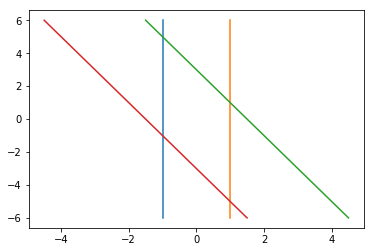

In [14]:

ws =  np.array([[1, 0], [1, 0], [2, 1], [2, 1]])
bs = [-1, 1, 3, -3]

na.animations.draw_polytope(ws, bs, 6)

In [10]:
ws =  np.array([[1, 0], [1, 0], [2, 1], [2, 1]])
bs = [-1, 1, 3, -3]


barrier = na.Barriers.LogPolytopeBarrier(ws, bs)
xs = np.linspace(-5, 5, 100)

X, Y = xs, xs
inp = np.array(np.meshgrid(xs, xs)).reshape(2, len(X)*len(Y)).T

out = barrier.f(inp)
# out = (inp[0] + inp[1]) * 1/8.
#himmelblau_2d(inp)

out = out.reshape(len(X), len(Y))

In [11]:
import plotly.graph_objects as go
import plotly

fig = go.Figure(data=[go.Surface(z=out, x=X, y=Y, colorscale="Viridis")])

fig.update_layout(title='Function', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [1]:
!pip install plotly

    100% |████████████████████████████████| 13.2MB 654kB/s ta 0:00:01
